In [1]:
import numpy as np
import matplotlib.pyplot as plt

We will start by plotting the example shown in class, and then plot a simple legendre transformation for the supplemental homework problem.

In [2]:
def GetV(x,u):
    #   This function comes from solving generator function for V(u).
    y=x**2
    v = x**2*u**2+x*u-y
    return v

In [3]:
def SolveForXU(u):
    #   This equation comes from solving for X=X(u). This is achieved by solving dV/dX=0.
    x = u/2/(1-u**2)
    return x

In [4]:
    xMax = 5
    xMin = -5
    xIncrement = 0.1

    uMin = -5
    uMax = 5
    uIncrement = 0.1

In [5]:
def PlotContactTransformation():

    uNumPoints = round((uMax - uMin)/uIncrement)
    uValues = np.linspace(uMin,uMax,uNumPoints)


    xNumPoints = round((xMax - xMin)/xIncrement)
    xValues = np.linspace(xMin,xMax,xNumPoints)
    fig,ax = plt.subplots()

    uValuesPlot = []
    vValues = []

    #   Plot envelope functions.
    for x in xValues:
        for u in uValues:
            try:
                v = GetV(x,u)
                uValuesPlot.append(u)
                vValues.append(v)
            except ZeroDivisionError:
                continue

        #   Only add the label once.
        if x == max(xValues) and u == max(uValues):
            ax.plot(uValuesPlot,vValues,color='lightblue',label='Envelope')
        else:
            ax.plot(uValuesPlot,vValues,color='lightblue')
        vValues = []
        uValuesPlot = []

    uNumPoints*=10
    uValues = np.linspace(uMin,uMax,uNumPoints)

    #   Plot generator function.
    for u in uValues:
        try:
            #   set dV/dX=0, then solve for X(u). Plug into X(u) equation.
            x = SolveForXU(u)
            v = GetV(x,u)
            
            #   these lists only get appended for defined v values.
            uValuesPlot.append(u)
            vValues.append(v)
        except ZeroDivisionError:
            continue
    ax.scatter(uValuesPlot,vValues,color='indianred',s=20,label='Contact Function')

    ax.legend()

    plt.ylabel(r"$v(u)$")
    plt.xlabel(r"$u$")


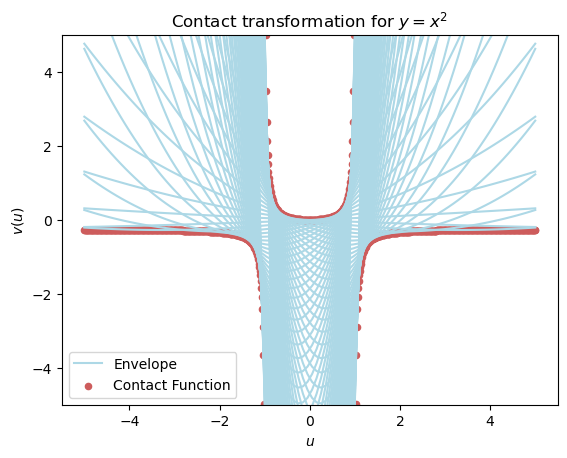

In [6]:
PlotContactTransformation()
plt.ylim(-5,5)
plt.title("Contact transformation for " r"$y=x^{2}$")
plt.show()     

The above plot matches what is in the notes. We will move to plotting a legendre transformation for y = ln(x), and the generator will be S = 0 = u*x - v - y. With the new generator, there will be a new v(u) function, and a new x(u) equation. Additionally, the x limits will need to be modified as necessary for the new functions.

In [7]:
def GetV(x,u):
    #   This function comes from solving generator function for V(u).
    y = np.log(x)
    v=x*u-y
    return v

In [8]:
def SolveForXU(u):
    #   This equation comes from solving for X=X(u). This is achieved by solving dV/dX=0.
    x = 1/u
    return x

In [9]:
    xMin = 0
    xMax = 25
    xIncrement = 0.1

    uMin = 0
    uMax = 5
    uIncrement = 0.1

C:\Users\tmjen\AppData\Local\Temp\ipykernel_12144\321403325.py:3: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)
C:\Users\tmjen\AppData\Local\Temp\ipykernel_12144\3977164696.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  x = 1/u
C:\Users\tmjen\AppData\Local\Temp\ipykernel_12144\321403325.py:4: RuntimeWarning: invalid value encountered in scalar multiply
  v=x*u-y


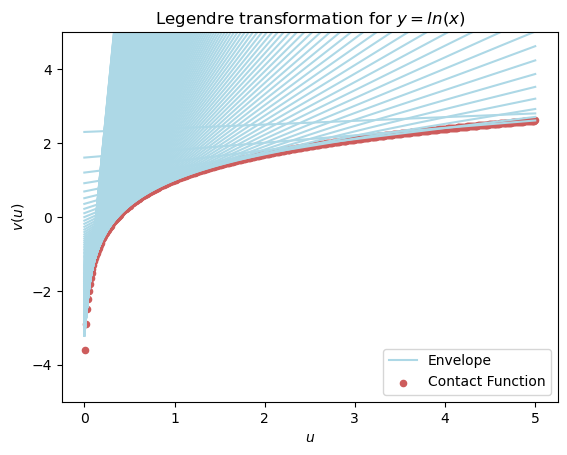

In [10]:
PlotContactTransformation()
plt.ylim(-5,5)
plt.title("Legendre transformation for " r"$y=ln(x)$")
plt.show()  

The above is a contact transformation for ln(x), and for this case we were able to use a legendre transformation. The RunTime warnings about undefined values can be ignored because the error trapping in the code prevents undefined values from being added to the arrays that get plotted.